Importing Modules

In [129]:
import pickle
import numpy as np
from scipy.stats.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib widget

import os

# Gathering Data

In [130]:
# this_path = os.path.dirname(os.path.abspath(__file__))
# print(this_path)
CWD = os.getcwd()

with open(f'{CWD}/FM2d.pck', 'rb') as f:
    FM = np.array(pickle.load(f)).transpose((1,2,0))
with open(f'{CWD}/genomes2d.pck', 'rb') as f:
    G  = np.array(pickle.load(f)).transpose((1,0))

print(G.shape)
N = G.shape[-1]

L = 11
L2 = L**2
FM = FM.reshape(L,L,L,L,-1)
G1  = G[:L2,:].reshape(L,L,-1)
G2  = G[L2:2*L2,:].reshape(L,L,-1)
G3  = G[2*L2:,:].reshape(L,L,-1)

(363, 100)


# Correlating Densities to FM element

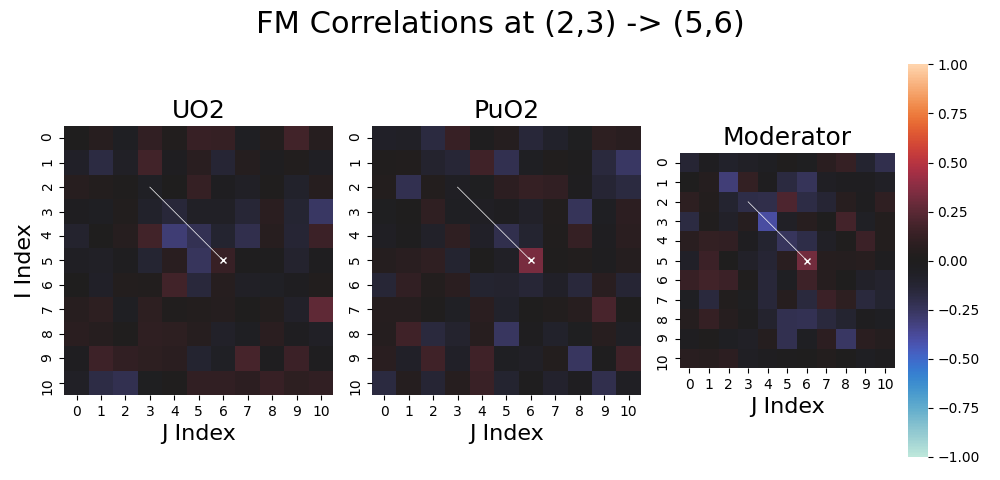

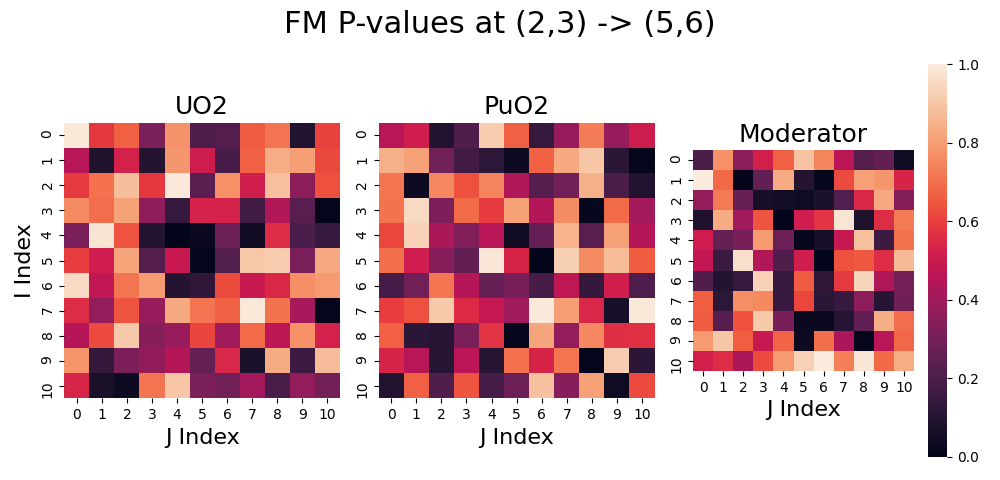

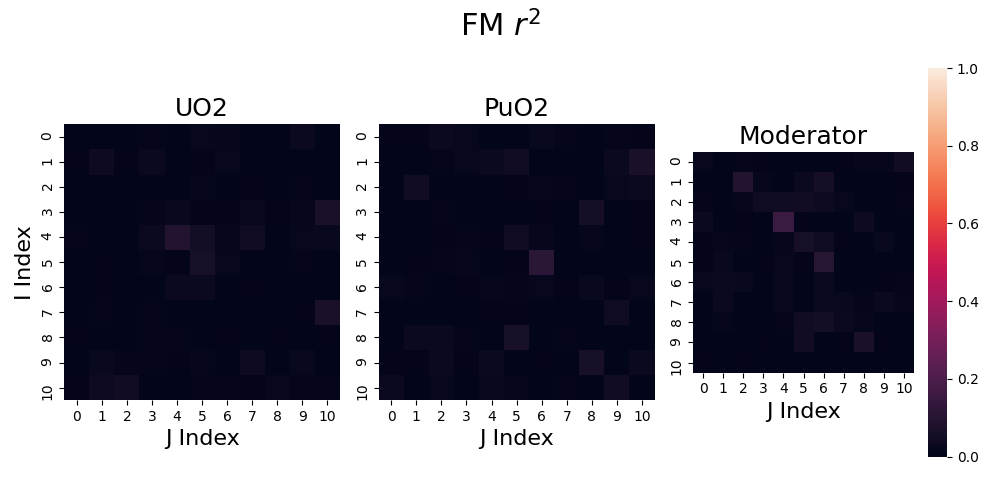

In [131]:
IDX = ((2,3),(5,6))
(IJ1,IJ2) = IDX
(I1,J1) = IJ1
(I2,J2) = IJ2

# Calculating Correlation Coefficients:
# for foo in range(100):
fm = FM[I2,J2,I1,J1,:]
RFM1 = np.zeros((L,L))
RFM2 = np.zeros((L,L))
RFM3 = np.zeros((L,L))
PFM1 = np.zeros((L,L))
PFM2 = np.zeros((L,L))
PFM3 = np.zeros((L,L))
for i in range(L):
    for j in range(L):
        g1ij = G1[i,j,:]
        g2ij = G2[i,j,:]
        g3ij = G3[i,j,:]
        RFM1[i,j], PFM1[i,j] = pearsonr(fm,g1ij)
        RFM2[i,j], PFM2[i,j] = pearsonr(fm,g2ij)
        RFM3[i,j], PFM3[i,j] = pearsonr(fm,g3ij)


plt.close('all')
# settings = {'robust':True, 'vmin':-1, 'vmax':1, 'square':True, 'cmap':'coolwarm'}
settings = {'robust':True, 'vmin':-1, 'vmax':1, 'square':True, 'cmap':'icefire'}
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle(f'FM Correlations at ({I1},{J1}) -> ({I2},{J2})', fontsize=22)
fig.set_figwidth(10);   fig.set_figheight(4.8)
ax1 = sns.heatmap(RFM1, ax=ax1, **settings, cbar=False)
ax1.plot([J1+0.5,J2+0.5], [I1+0.5,I2+0.5], '-w', lw=0.5)
ax1.plot(J2+0.5, I2+0.5, 'xw', ms=5)
ax1.set_xlabel('J Index', fontsize=16)
ax1.set_ylabel('I Index', fontsize=16)
ax1.set_title('UO2', fontsize=18)
ax2 = sns.heatmap(RFM2, ax=ax2, **settings, cbar=False)
ax2.plot([J1+0.5,J2+0.5], [I1+0.5,I2+0.5], '-w', lw=0.5)
ax2.plot(J2+0.5, I2+0.5, 'xw', ms=5)
ax2.set_xlabel('J Index', fontsize=16)
ax2.set_title('PuO2', fontsize=18)
ax3 = sns.heatmap(RFM3, ax=ax3, **settings)
ax3.plot([J1+0.5,J2+0.5], [I1+0.5,I2+0.5], '-w', lw=0.5)
ax3.plot(J2+0.5, I2+0.5, 'xw', ms=5)
ax3.set_xlabel('J Index', fontsize=16)
ax3.set_title('Moderator', fontsize=18)
fig.tight_layout()


settings = {'robust':True, 'vmin':0, 'vmax':1, 'square':True, 'cmap':'rocket'}
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle(f'FM P-values at ({I1},{J1}) -> ({I2},{J2})', fontsize=22)
fig.set_figwidth(10);   fig.set_figheight(4.8)
ax1 = sns.heatmap(PFM1, ax=ax1, **settings, cbar=False, )
ax1.set_xlabel('J Index', fontsize=16)
ax1.set_ylabel('I Index', fontsize=16)
ax1.set_title('UO2', fontsize=18)
ax2 = sns.heatmap(PFM2, ax=ax2, **settings, cbar=False)
ax2.set_xlabel('J Index', fontsize=16)
ax2.set_title('PuO2', fontsize=18)
ax3 = sns.heatmap(PFM3, ax=ax3, **settings)
ax3.set_xlabel('J Index', fontsize=16)
ax3.set_title('Moderator', fontsize=18)
fig.tight_layout()

settings = {'robust':True, 'vmin':0, 'vmax':1, 'square':True, 'cmap':'rocket'}
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle(r'FM $r^2$', fontsize=22)
fig.set_figwidth(10);   fig.set_figheight(4.8)
ax1 = sns.heatmap(RFM1**2, ax=ax1, **settings, cbar=False)
ax1.set_xlabel('J Index', fontsize=16)
ax1.set_ylabel('I Index', fontsize=16)
ax1.set_title('UO2', fontsize=18)
ax2 = sns.heatmap(RFM2**2, ax=ax2, **settings, cbar=False)
ax2.set_xlabel('J Index', fontsize=16)
ax2.set_title('PuO2', fontsize=18)
ax3 = sns.heatmap(RFM3**2, ax=ax3, **settings)
ax3.set_xlabel('J Index', fontsize=16)
ax3.set_title('Moderator', fontsize=18)
fig.tight_layout()

# settings = {'robust':True, 'vmin':0, 'vmax':1, 'square':True}

# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle(f'FM Null Hypothesis at ({I1},{J1}) -> ({I2},{J2})', fontsize=22)
# fig.set_figwidth(10);   fig.set_figheight(4.8)
# ax1 = sns.heatmap((PFM1 <= 0.05), ax=ax1, **settings, cbar=False)
# ax1.set_xlabel('J Index', fontsize=16)
# ax1.set_ylabel('I Index', fontsize=16)
# ax1.set_title('UO2', fontsize=18)
# ax2 = sns.heatmap((PFM2 <= 0.05), ax=ax2, **settings)
# ax2.set_xlabel('J Index', fontsize=16)
# ax2.set_title('PuO2', fontsize=18)
# fig.tight_layout()

# settings = {'robust':True, 'square':True}

# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle(f'Genome Values', fontsize=22)
# fig.set_figwidth(10);   fig.set_figheight(4.8)
# ax1 = sns.heatmap(G1[:,:,2], ax=ax1, **settings)
# ax1.set_xlabel('J Index', fontsize=16)
# ax1.set_ylabel('I Index', fontsize=16)
# ax1.set_title('Fuel', fontsize=18)
# ax2 = sns.heatmap(G2[:,:,2], ax=ax2, **settings)
# ax2.set_xlabel('J Index', fontsize=16)
# ax2.set_title('Moderator', fontsize=18)
# fig.tight_layout()